In [13]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
# shows plots in jupyter window, doesn't open a new one

In [14]:
data = pd.read_csv('ex1data1.txt', header=None, names=['Population','Profit'])

m=len(data)
X = np.append(np.ones((m,1)),np.array(data["Population"]).reshape((m,1)),axis=1)
y=np.array(data["Profit"]).reshape(m,1)

data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


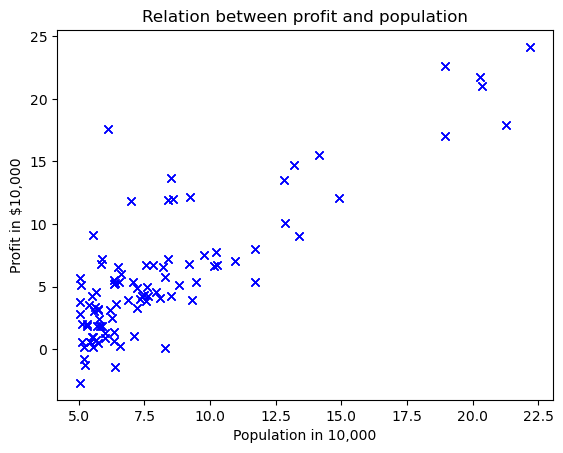

In [16]:
plt.plot(data['Population'],data['Profit'],'bx')
plt.xlabel('Population in 10,000')
plt.ylabel('Profit in $10,000')
plt.title('Relation between profit and population')
plt.show()

In [17]:
def cost_functionJ(X,y,theta):
    m=len(y)
    predictions = X @ theta
    errors = predictions - y
    cost = (1 / (2*m))*(errors.T @ errors)
    return cost.item()

In [20]:
initial_theta = np.zeros((2,1))
print(cost_functionJ(X,y,initial_theta))

32.07273387745567


In [21]:
def gradient_descent(X,y,theta,alpha,iterations):
    m=len(y)
    J_history=[]
    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradient = (1/m) * (X.T @ errors)
        theta = theta - alpha * gradient

        cost = cost_functionJ(X,y,theta)
        J_history.append(cost)
    return theta, J_history

In [33]:
alpha = 0.01
iterations = 2500
theta = np.zeros((2,1))

theta, J_history = gradient_descent(X,y,theta,alpha,iterations)
print(theta)

[[-3.85208068]
 [ 1.18864349]]


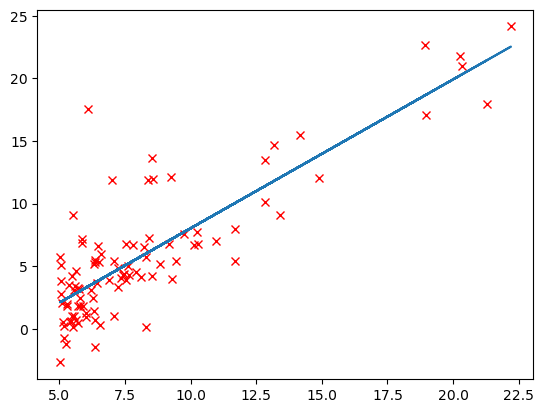

In [40]:
plt.plot(X[:,1],y,'rx',label='Training data')
plt.plot(X[:,1], X.dot(theta), label='Linear regression')
plt.show()

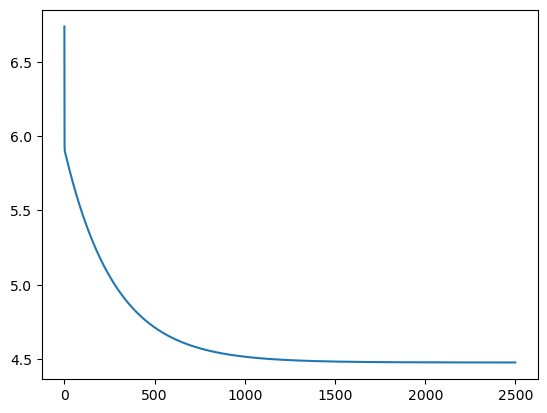

In [41]:
plt.plot(J_history)
plt.show()

In [49]:
prediction = np.array([1,3.5]).dot(theta).item() * 10000
'In a city with a population of 35,000, we predict a profit of $%.2f' % prediction

'In a city with a population of 35,000, we predict a profit of $3081.72'

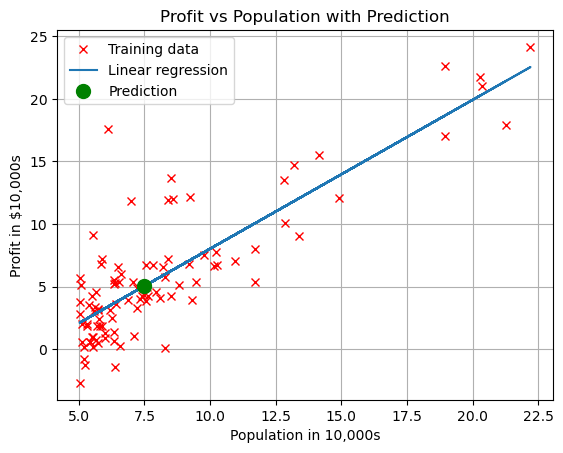

In [58]:
# Your predicted point (population = 35,000, scaled as 3.5)
population_pred = 7.5

# Calculate predicted profit (in units of 10,000)
predicted_profit = np.array([1, population_pred]).dot(theta).item()

plt.plot(X[:,1], y, 'rx', label='Training data')                  # Original data
plt.plot(X[:,1], X.dot(theta), label='Linear regression')         # Regression line

# Plot the prediction point as a big green circle
plt.plot(population_pred, predicted_profit, 'go', markersize=10, label='Prediction')

plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit vs Population with Prediction')
plt.legend()
plt.grid(True)
plt.show()